# An International Perspective on Primary Education, Gender, and the Labor Market
*Supporting Code & Information*

University of California, Berkeley | DATASCI 200

Jordan Andersen, Courtney Chen, Maia Kennedy

In [3]:
!pip install gdown #install gdown if necessary

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata


In [4]:
#Prepare file for reading
import gdown

file_id = '13qSs3fIG_AjazLWV5mMnAnAYkTgrQKA9'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file from Google Drive
gdown.download(url, 'WDI_Master.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=13qSs3fIG_AjazLWV5mMnAnAYkTgrQKA9
To: /Users/maiakennedy/Downloads/WDI_Master.csv
100%|██████████| 1.26M/1.26M [00:00<00:00, 10.2MB/s]


'WDI_Master.csv'

In [5]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

df = pd.read_csv('WDI_Master.csv')

### School Enrollment Analysis





##### Mean % of Primary School Enrollment, All Students
---

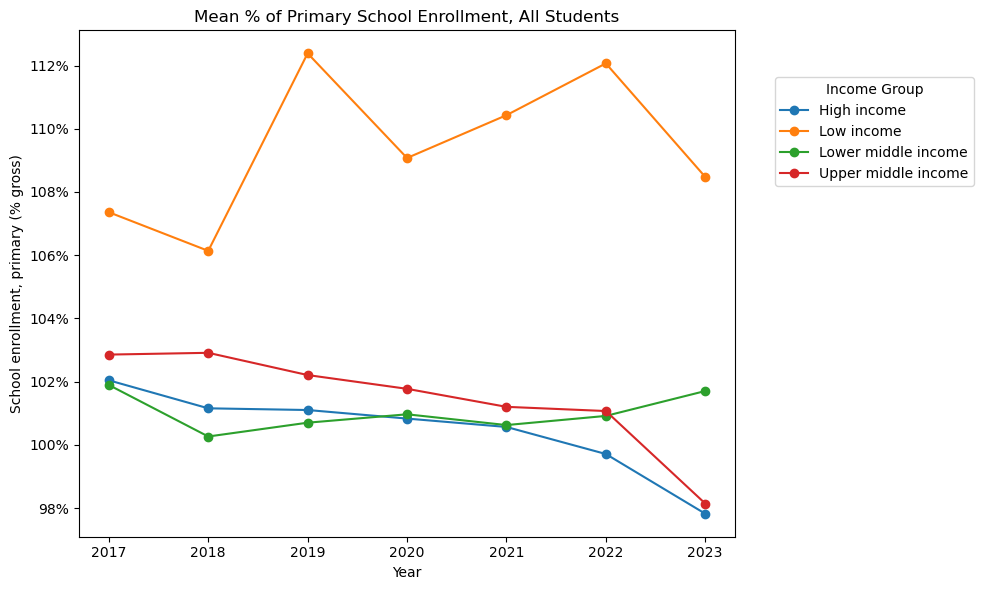

In [6]:
## Prep for Mean Enrollment (males and females)
tot_enroll = df[df['indicator_name'] == 'School enrollment, primary (% gross)']

# Group by income group by year and find the mean of the value
mean_enrollment = tot_enroll.groupby(['income_group','indicator_name','year'])['value'].mean()
mean_enrollment = mean_enrollment.reset_index()

# Plot the mean of male and female enrollment by income group
plt.figure(figsize=(10,6))

pivot_data = mean_enrollment.pivot(index='year', columns='income_group', values='value')
pivot_data.plot(ax=plt.gca(), marker='o')

def percent_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_format))

plt.title('Mean % of Primary School Enrollment, All Students')
plt.xlabel('Year')
plt.ylabel('School enrollment, primary (% gross)')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, .8), loc = 'center left')
plt.tight_layout()
plt.savefig("mean_primary_enrollment.png")
plt.show()

##### Mean % of Primary School Enrollment, Female and Male (% of Gross)
---

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/368199841.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([f'{int(label)}%' for label in axes[0].get_yticks()])
/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/368199841.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels([f'{int(label)}%' for label in axes[1].get_yticks()])


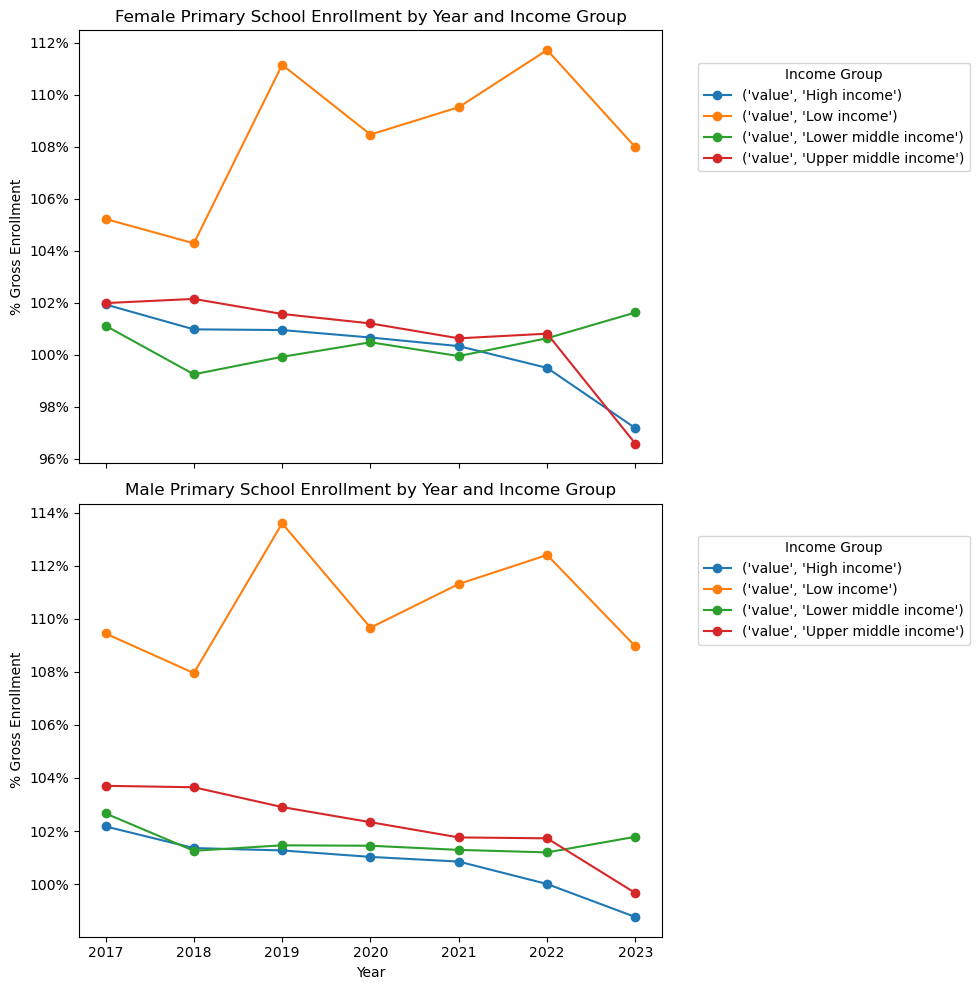

In [7]:
### Male and female primary enrollment
enroll_female = df[df['indicator_name'] == 'School enrollment, primary, female (% gross)']
enroll_male = df[df['indicator_name'] == 'School enrollment, primary, male (% gross)']
enroll_female_grouped = pd.DataFrame(enroll_female.groupby(['year', 'income_group'])['value'].mean()).unstack()
enroll_male_grouped = pd.DataFrame(enroll_male.groupby(['year', 'income_group'])['value'].mean()).unstack()

# subplots
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True)

# female enrollment plot
for income_group in enroll_female_grouped.columns:
    axes[0].plot(enroll_female_grouped.index, enroll_female_grouped[income_group], marker='o', label=income_group)

axes[0].set_title('Female Primary School Enrollment by Year and Income Group')
axes[0].set_ylabel('% Gross Enrollment')
axes[0].legend(title='Income Group', bbox_to_anchor=(1.05, .8), loc='center left')
axes[0].set_yticklabels([f'{int(label)}%' for label in axes[0].get_yticks()])

# male enrollment plot
for income_group in enroll_male_grouped.columns:
    axes[1].plot(enroll_male_grouped.index, enroll_male_grouped[income_group], marker='o', label=income_group)

axes[1].set_title('Male Primary School Enrollment by Year and Income Group')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('% Gross Enrollment')
axes[1].legend(title='Income Group', bbox_to_anchor=(1.05, .8), loc='center left')
axes[1].set_yticklabels([f'{int(label)}%' for label in axes[1].get_yticks()])

# layout
plt.tight_layout()
plt.savefig("primary_enrollment_by_gender.png")
plt.show()

##### Mean % of Secondary School Enrollment, Female and Male (% of Gross)
---

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/1094967731.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([f'{int(label)}%' for label in axes[0].get_yticks()])
/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/1094967731.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels([f'{int(label)}%' for label in axes[1].get_yticks()])


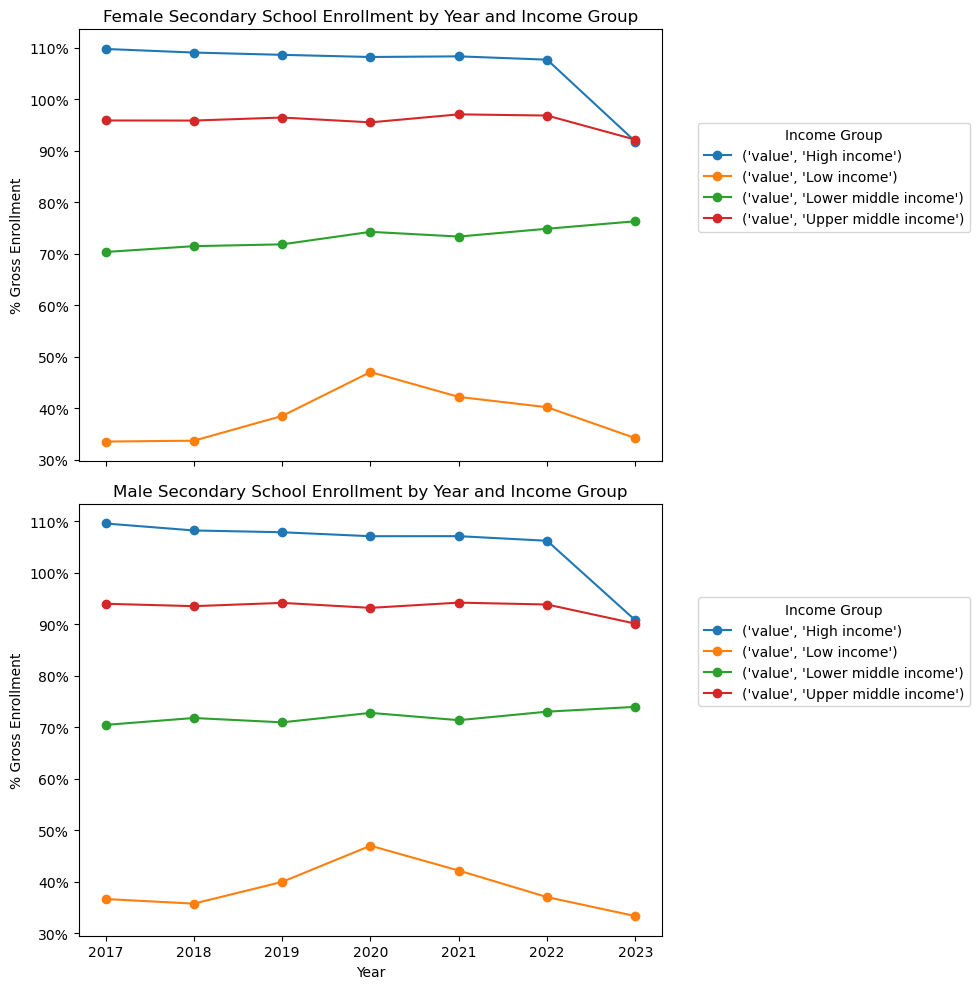

<Figure size 640x480 with 0 Axes>

In [8]:
### Secondary enrollment visualizations
enroll_female = df[df['indicator_name'] == 'School enrollment, secondary, female (% gross)']
enroll_male = df[df['indicator_name'] == 'School enrollment, secondary, male (% gross)']
enroll_female_grouped = pd.DataFrame(enroll_female.groupby(['year', 'income_group'])['value'].mean()).unstack()
enroll_male_grouped = pd.DataFrame(enroll_male.groupby(['year', 'income_group'])['value'].mean()).unstack()
enroll_female_grouped

# subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)  # Reduced width

# female enrollment plot
for income_group in enroll_female_grouped.columns:
    axes[0].plot(enroll_female_grouped.index, enroll_female_grouped[income_group], marker='o', label=income_group)

axes[0].set_title('Female Secondary School Enrollment by Year and Income Group')
axes[0].set_ylabel('% Gross Enrollment')
axes[0].legend(title='Income Group', bbox_to_anchor=(1.05, .8), loc='upper left')
axes[0].set_yticklabels([f'{int(label)}%' for label in axes[0].get_yticks()])

# male enrollment plot
for income_group in enroll_male_grouped.columns:
    axes[1].plot(enroll_male_grouped.index, enroll_male_grouped[income_group], marker='o', label=income_group)

axes[1].set_title('Male Secondary School Enrollment by Year and Income Group')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('% Gross Enrollment')
axes[1].legend(title='Income Group', bbox_to_anchor=(1.05, .8), loc='upper left')
axes[1].set_yticklabels([f'{int(label)}%' for label in axes[1].get_yticks()])

# layout
plt.tight_layout()
plt.show()
plt.savefig("secondary_enrollment_by_gender.png")

##### Distribution of Enrollment Gaps by Income Group (2021)
---

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/684069320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpi.loc[:,'enrollment_gap'] = (gpi['value'] - 1).round(3)


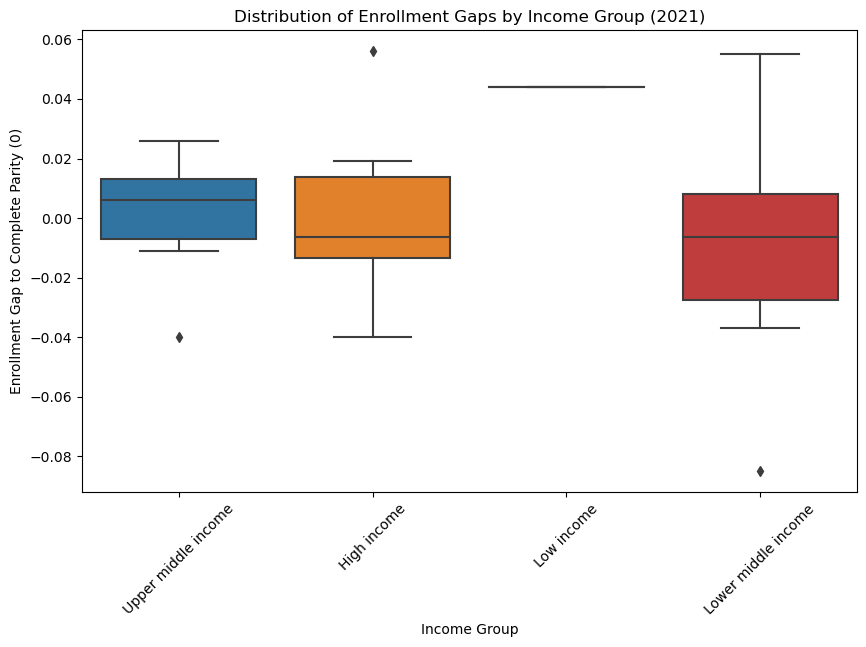

<Figure size 640x480 with 0 Axes>

In [9]:
# Gender Parity Index Visualizations
gpi = df[df['indicator_name'] == 'School enrollment, primary and secondary (gross), gender parity index (GPI)']

# Calculate the gap to complete parity (Enrollment Gap = GPI - 1, with 1 representing complete parity)
gpi.loc[:,'enrollment_gap'] = (gpi['value'] - 1).round(3)

# 2021 Enrollment data (last time that data was published from the majority of countries)
gpi_2021 = gpi[gpi['year'] == 2021]

# Box plots across income groups
plt.figure(figsize=(10,6))
sns.boxplot(data=gpi_2021, x= 'income_group', y="enrollment_gap")
plt.title('Distribution of Enrollment Gaps by Income Group (2021)')
plt.xlabel('Income Group')
plt.ylabel('Enrollment Gap to Complete Parity (0)')
plt.xticks(rotation=45)
plt.show()
plt.savefig("gender_parity.png")


### Labor Market Variables Analysis

In [10]:
###Prep for Labor Force & Unemployment Variables
lfp_fe_df = df[df['indicator_code'].str.contains('CACT.FE.ZS').reset_index(drop = True)]
lfp_ma_df = df[df['indicator_code'].str.contains('CACT.MA.ZS').reset_index(drop = True)]
unemp_fe_df = df[df['indicator_code'].str.contains('TOTL.FE.ZS').reset_index(drop = True)]
unemp_ma_df = df[df['indicator_code'].str.contains('TOTL.MA.ZS').reset_index(drop = True)]

#Means of Labor Force Participation and Unemployment proportions across income groups and years for females
lfp_fe_mean = lfp_fe_df.groupby(['income_group','year']).agg({'value': 'mean'}).reset_index()
unemp_fe_mean = unemp_fe_df.groupby(['income_group','year']).agg({'value': 'mean'}).reset_index()

#Means of Labor Force Participation and Unemployment proportions across income groups and years for males
lfp_ma_mean = lfp_ma_df.groupby(['income_group','year']).agg({'value': 'mean'}).reset_index()
unemp_ma_mean = unemp_ma_df.groupby(['income_group','year']).agg({'value': 'mean'}).reset_index()

#New dataframe with mean values
#merged_df = pd.merge(lfp_fe_mean, lfp_ma_mean, unemp_fe_mean, unemp_ma_mean, on = ['income_group', 'year'], how = 'outer', suffixes = ('_FE_LFP', '_MA_LFP', '_FE_Unemp', '_MA_Unemp'))
merged_fe_df = pd.merge(lfp_fe_mean, unemp_fe_mean, on = ['income_group', 'year'], how = 'outer', suffixes = ('_FE_LFP', '_FE_Unemp'))
merged_fe_df = merged_fe_df.rename(columns = {'value_FE_LFP': 'mean_value_fe_LFP', 'value_FE_Unemp': 'mean_value_fe_Unemp'})
merged_df1 = pd.merge(merged_fe_df, lfp_ma_mean, on = ['income_group', 'year'], how = 'outer')
merged_df = pd.merge(merged_df1, unemp_ma_mean, on = ['income_group', 'year'], how = 'outer')
merged_df = merged_df.rename(columns = {'value_x': 'mean_value_ma_LFP', 'value_y': 'mean_value_ma_Unemp'})
print(merged_df.head(10))


  income_group  year  mean_value_fe_LFP  mean_value_fe_Unemp  \
0  High income  2017          53.070613             7.420694   
1  High income  2018          53.250597             6.775290   
2  High income  2019          53.360306             6.411032   
3  High income  2020          52.754710             7.625774   
4  High income  2021          53.325855             7.030339   
5  High income  2022          53.938242             6.122839   
6  High income  2023          54.165935             5.950452   
7   Low income  2017          55.330385             7.944192   
8   Low income  2018          55.167885             7.728731   
9   Low income  2019          54.964192             7.757538   

   mean_value_ma_LFP  mean_value_ma_Unemp  
0          69.788661             6.296629  
1          69.804339             5.736032  
2          69.606758             5.409000  
3          68.634597             6.648371  
4          68.858710             6.204516  
5          69.461597           

##### Mean % of Labor Force Participation, Female Populations Ages 15+
---

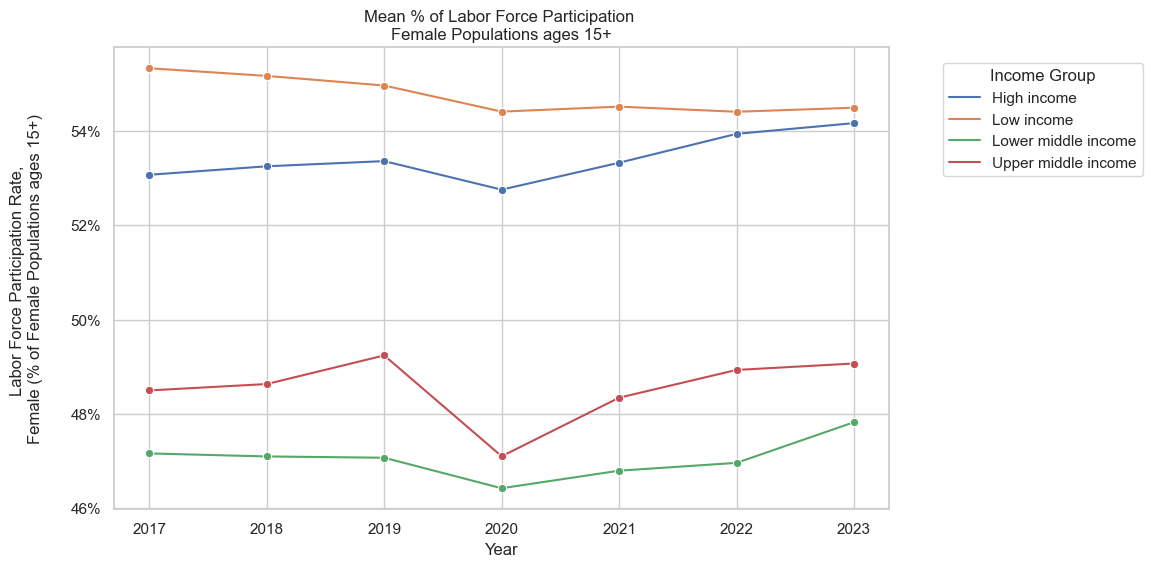

In [11]:
### Mean labor force participation for females
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.lineplot(data = merged_df, x = 'year', y = 'mean_value_fe_LFP', hue = 'income_group', marker = 'o')

def percent_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_format))

plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate, \nFemale (% of Female Populations ages 15+)', labelpad = 20)
plt.title('Mean % of Labor Force Participation \nFemale Populations ages 15+')
plt.legend(title = 'Income Group', loc = 'upper left', bbox_to_anchor = (1.05, 1) ,borderaxespad = 1)
plt.savefig("fe_lfp_means", bbox_inches='tight')

plt.show()

##### Mean % of Labor Force Participation, Male Populations Ages 15+
---

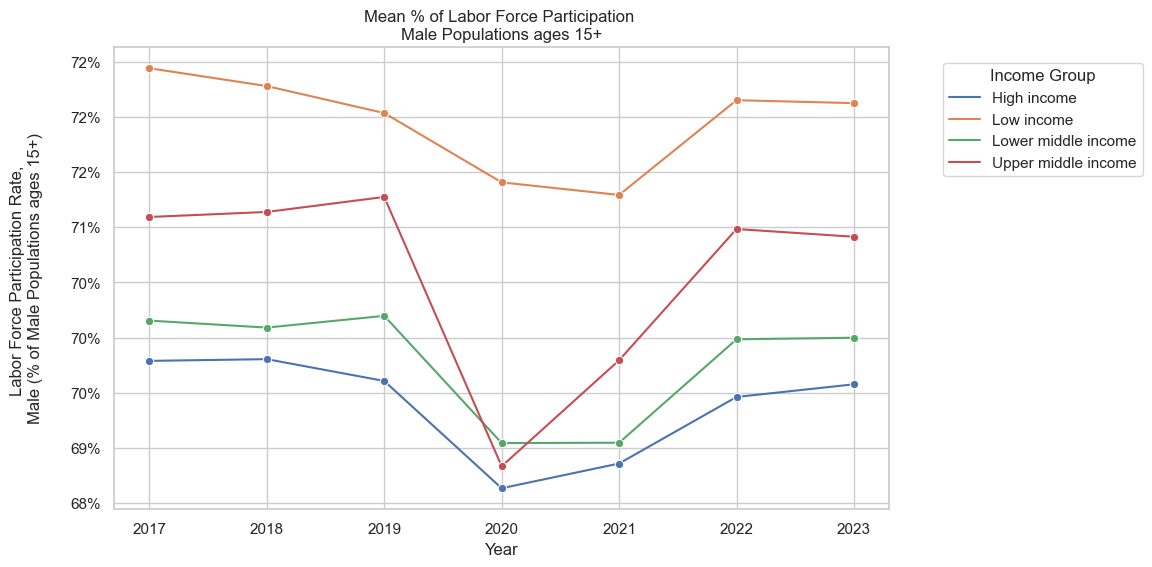

In [12]:
### Mean labor force participation for females
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.lineplot(data = merged_df, x = 'year', y = 'mean_value_ma_LFP', hue = 'income_group', marker = 'o')

def percent_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_format))

plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate, \nMale (% of Male Populations ages 15+)', labelpad = 20)
plt.title('Mean % of Labor Force Participation \nMale Populations ages 15+')
plt.legend(title = 'Income Group', loc = 'upper left', bbox_to_anchor = (1.05, 1) ,borderaxespad = 1)
plt.savefig("ma_lfp_means", bbox_inches='tight')

plt.show()

##### Mean % of Unemployment, % of Female Labor Force
---


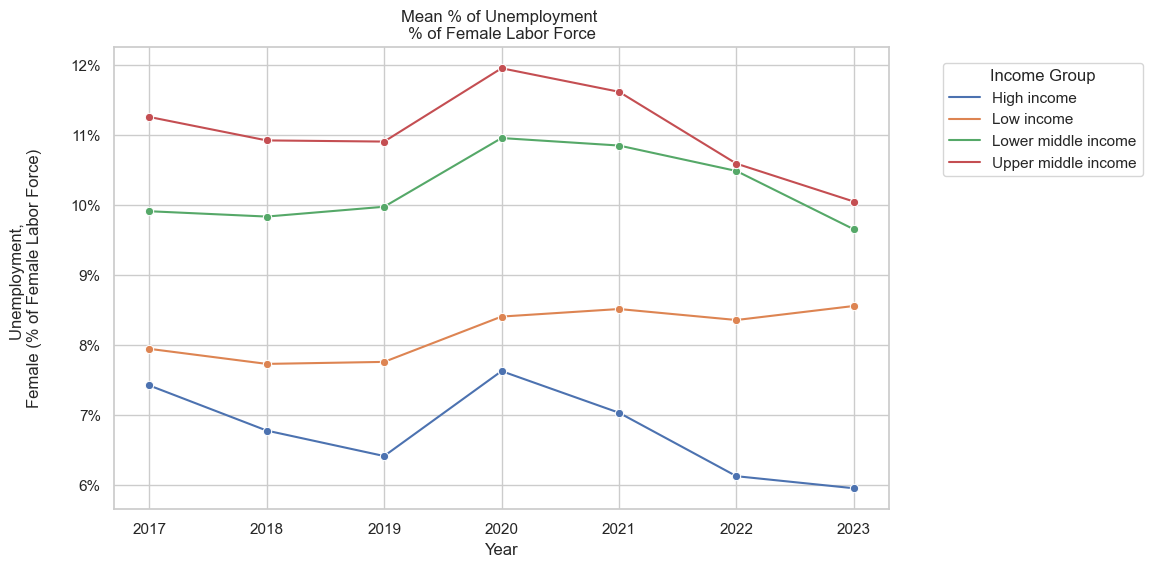

In [13]:
### Mean unemployment for females
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.lineplot(data = merged_df, x = 'year', y = 'mean_value_fe_Unemp', hue = 'income_group', marker = 'o')

def percent_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_format))

plt.xlabel('Year')
plt.ylabel('Unemployment, \nFemale (% of Female Labor Force)', labelpad = 20)
plt.title('Mean % of Unemployment \n% of Female Labor Force')
plt.legend(title = 'Income Group', loc = 'upper left', bbox_to_anchor = (1.05, 1) ,borderaxespad = 1)
plt.savefig("fe_unemp_means", bbox_inches='tight')

plt.show()

##### Mean % of Unemployment, % of Female Labor Force
---

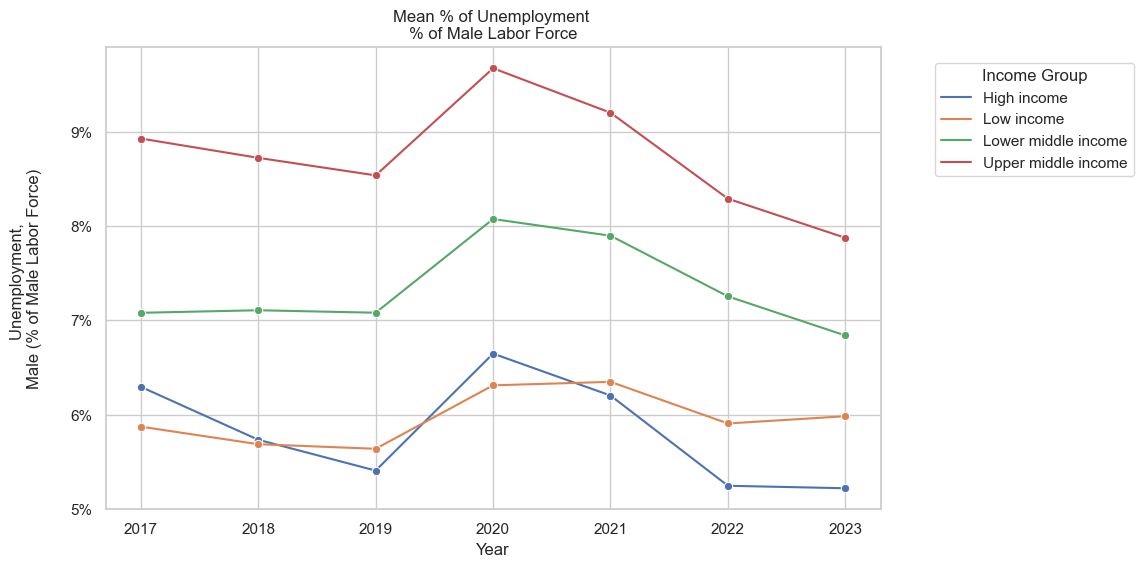

In [14]:
### Mean unemployment for males
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.lineplot(data = merged_df, x = 'year', y = 'mean_value_ma_Unemp', hue = 'income_group', marker = 'o')

def percent_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_format))

plt.xlabel('Year')
plt.ylabel('Unemployment, \nMale (% of Male Labor Force)', labelpad = 20)
plt.title('Mean % of Unemployment \n% of Male Labor Force')
plt.legend(title = 'Income Group', loc = 'upper left', bbox_to_anchor = (1.05, 1) ,borderaxespad = 1)
plt.savefig("ma_unemp_means", bbox_inches='tight')

plt.show()

### Conclusions

In [15]:
###Prepare labels for heat mapping
mapping = {
    'SL.TLF.CACT.FE.ZS': '% Labor Force, Female',
    'SL.TLF.CACT.MA.ZS': '% Labor Force, Male',
    'SL.UEM.TOTL.FE.ZS': '% Unemployment, Female',
    'SL.UEM.TOTL.MA.ZS': '% Unemployment, Male',
    'SE.PRSC.FM.ZS': 'Primary & Secondary Enrollment, GPI',
    'SE.PRM.ENRR.FE': 'Primary School Enrollment, Female',
    'SE.PRM.ENRR.MA': 'Primary School Enrollment, Male',
    'SE.ENR.PRSC.FM.ZS': 'School Enrollment, Primary & Secondary - GPI'
}

df['short_indicator_name'] = df['indicator_code'].map(mapping)

##### Comparing primary school enrollment, labor force participation and unemployment for females
---

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/28986545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)


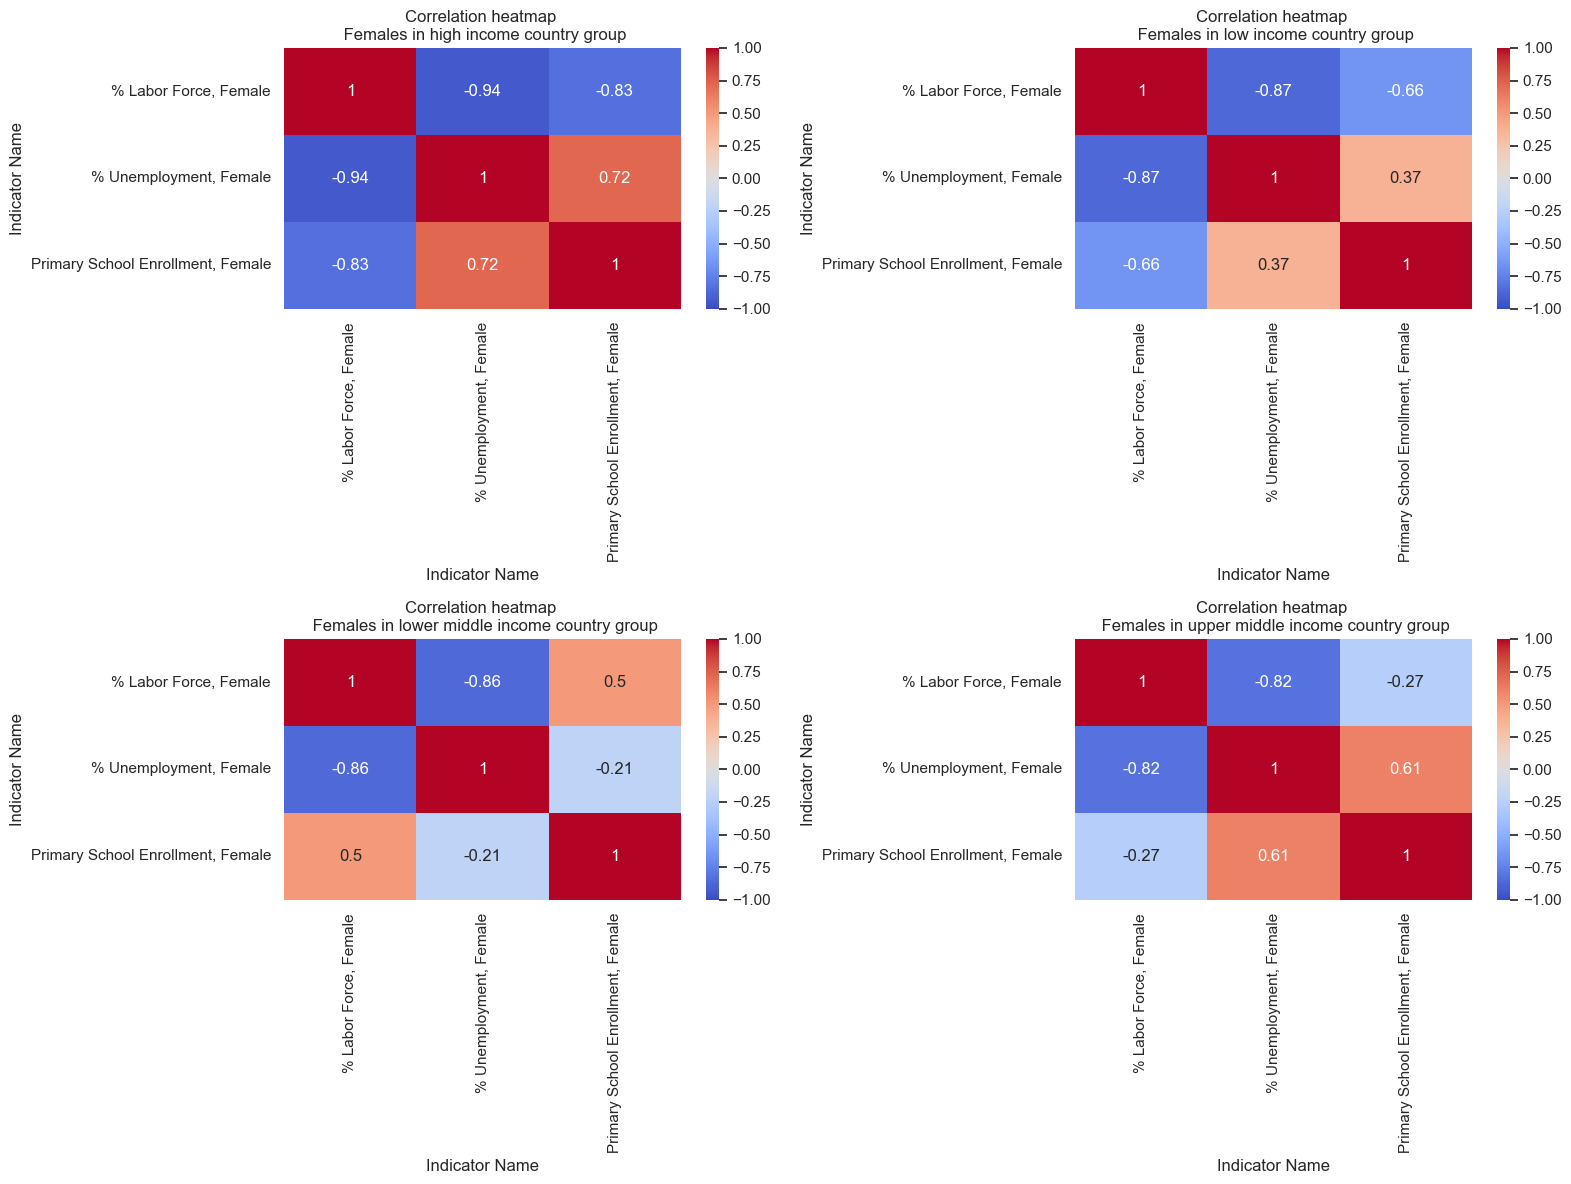

In [16]:
###Heat map for primary school enrollment, labor force participation and unemployment for females
income_groups = df['income_group'].unique()
selected_enrr_metrics = ['PRM.ENRR.FE', 'CACT.FE.ZS', 'TOTL.FE.ZS']

filtered_heat_enrr_metrics = df[df['indicator_code'].str.contains('|'.join(selected_enrr_metrics))]
filtered_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)

pivot_enrr_df = filtered_heat_enrr_metrics.pivot_table(index= ['year', 'income_group'], columns = 'Indicator Name', values = 'value', aggfunc = 'mean')
pivot_enrr_df.reset_index(inplace = True)

income_groups = pivot_enrr_df['income_group'].unique()

ncols = 2  # Number of columns (2 per row)
nrows = (len(income_groups) + ncols - 1) // ncols  # Calculate the number of rows required
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols * 8, nrows * 6))

axes = axes.flatten()

# Loop through each income group and plot a correlation heatmap
for i, income_group in enumerate(income_groups):
    # Filter data for the current income group
    group_enrr_data = pivot_enrr_df[pivot_enrr_df['income_group'] == income_group]

    # Drop non-numeric columns ('Year' and 'Income Group') for correlation calculation
    group_enrr_data = group_enrr_data.drop(columns=['year', 'income_group'])

    # Calculate the correlation matrix for the selected variables
    correlation_enrr_matrix = group_enrr_data.corr()

    # Plot the heatmap for this income group
    sns.heatmap(correlation_enrr_matrix, annot=True, cmap="coolwarm", ax=axes[i], vmin=-1, vmax=1)
    axes[i].set_title(f'Correlation heatmap \n Females in {income_group.lower()} country group')
    plt.subplots_adjust(wspace=1.0, hspace=1.5)
    plt.savefig("female_corr.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

##### Comparing primary school enrollment, labor force participation and unemployment for males

---



/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/3802473767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ma_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)


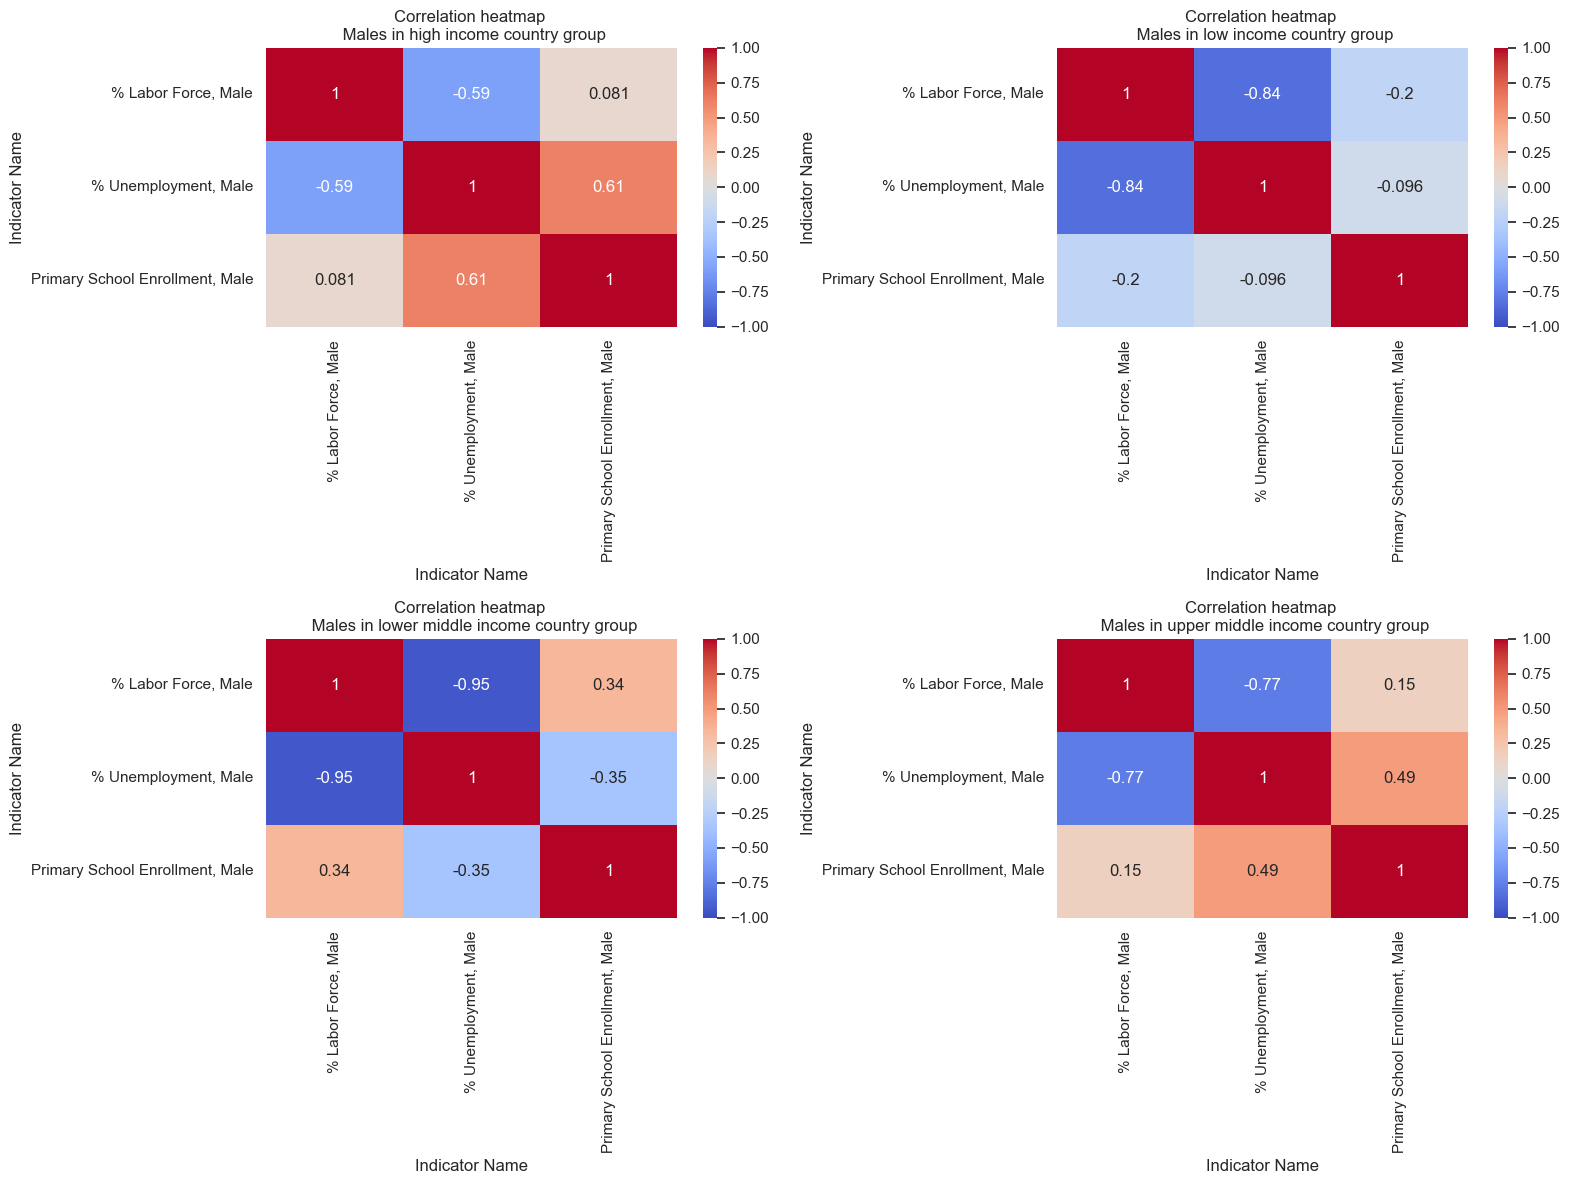

In [17]:
###Heat map for primary school enrollment, labor force participation and unemployment for males

income_groups = df['income_group'].unique()
selected_ma_enrr_metrics = ['PRM.ENRR.MA', 'CACT.MA.ZS', 'TOTL.MA.ZS']

filtered_ma_heat_enrr_metrics = df[df['indicator_code'].str.contains('|'.join(selected_ma_enrr_metrics))]
filtered_ma_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)

pivot_enrr_ma_df = filtered_ma_heat_enrr_metrics.pivot_table(index= ['year', 'income_group'], columns = 'Indicator Name', values = 'value', aggfunc = 'mean')
pivot_enrr_ma_df.reset_index(inplace = True)

income_groups = pivot_enrr_df['income_group'].unique()

ncols = 2  # Number of columns (2 per row)
nrows = (len(income_groups) + ncols - 1) // ncols  # Calculate the number of rows required
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols * 8, nrows * 6))

axes = axes.flatten()

# Loop through each income group and plot a correlation heatmap
for i, income_group in enumerate(income_groups):
    # Filter data for the current income group
    group_enrr_ma_data = pivot_enrr_ma_df[pivot_enrr_ma_df['income_group'] == income_group]

    # Drop non-numeric columns ('Year' and 'Income Group') for correlation calculation
    group_enrr_ma_data = group_enrr_ma_data.drop(columns=['year', 'income_group'])

    # Calculate the correlation matrix for the selected variables
    correlation_enrr_ma_matrix = group_enrr_ma_data.corr()

    # Plot the heatmap for this income group
    sns.heatmap(correlation_enrr_ma_matrix, annot=True, cmap="coolwarm", ax=axes[i], vmin=-1, vmax=1)
    axes[i].set_title(f'Correlation heatmap \n Males in {income_group.lower()} country group')
    plt.subplots_adjust(wspace=1.0, hspace=1.5)
    plt.savefig("male_corr.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

##### Comparing school enrollment - gender parity index, labor force participation and unemployment for females

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/542560900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)


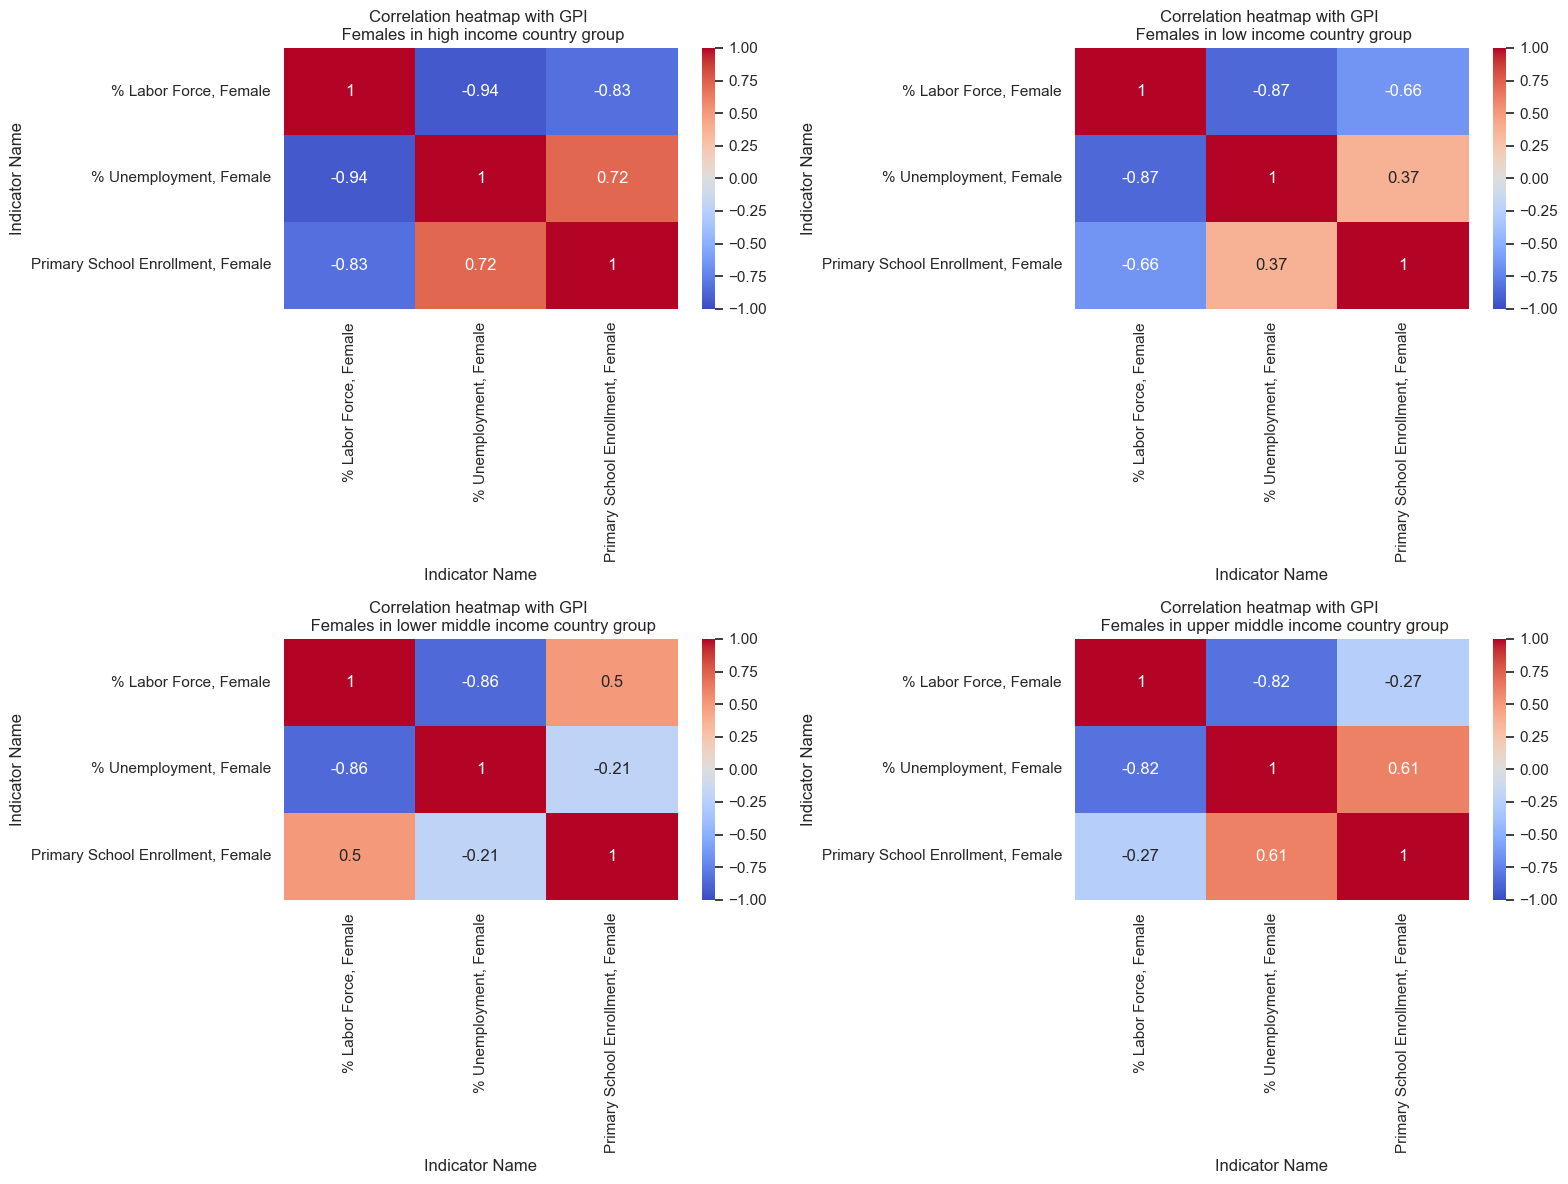

In [18]:
###Heat map for primary school enrollment, labor force participation and unemployment for females
income_groups = df['income_group'].unique()
select_enrr_metrics = ['SE.ENR.PRSC.FM.ZS', 'CACT.FE.ZS', 'TOTL.FE.ZS']

filter_heat_enrr_metrics = df[df['indicator_code'].str.contains('|'.join(selected_enrr_metrics))]
filter_heat_enrr_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)

pivot_enrr2_df = filter_heat_enrr_metrics.pivot_table(index= ['year', 'income_group'], columns = 'Indicator Name', values = 'value', aggfunc = 'mean')
pivot_enrr2_df.reset_index(inplace = True)

income_groups = pivot_enrr_df['income_group'].unique()

ncols = 2  # Number of columns (2 per row)
nrows = (len(income_groups) + ncols - 1) // ncols  # Calculate the number of rows required
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols * 8, nrows * 6))

axes = axes.flatten()

# Loop through each income group and plot a correlation heatmap
for i, income_group in enumerate(income_groups):
    # Filter data for the current income group
    group_enrr2_data = pivot_enrr2_df[pivot_enrr_df['income_group'] == income_group]

    # Drop non-numeric columns ('Year' and 'Income Group') for correlation calculation
    group_enrr2_data = group_enrr2_data.drop(columns=['year', 'income_group'])

    # Calculate the correlation matrix for the selected variables
    correlation_enrr2_matrix = group_enrr2_data.corr()

    # Plot the heatmap for this income group
    sns.heatmap(correlation_enrr2_matrix, annot=True, cmap="coolwarm", ax=axes[i], vmin=-1, vmax=1)
    axes[i].set_title(f'Correlation heatmap with GPI \n Females in {income_group.lower()} country group')
    plt.subplots_adjust(wspace=2, hspace=2.5)
    plt.savefig("gpi_female_corr.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

##### Bringing it all together - all variable correlation
---

/var/folders/lg/2vsr6fg16w74zhjkn_cnwj7r0000gn/T/ipykernel_33329/850494881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_heat_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)


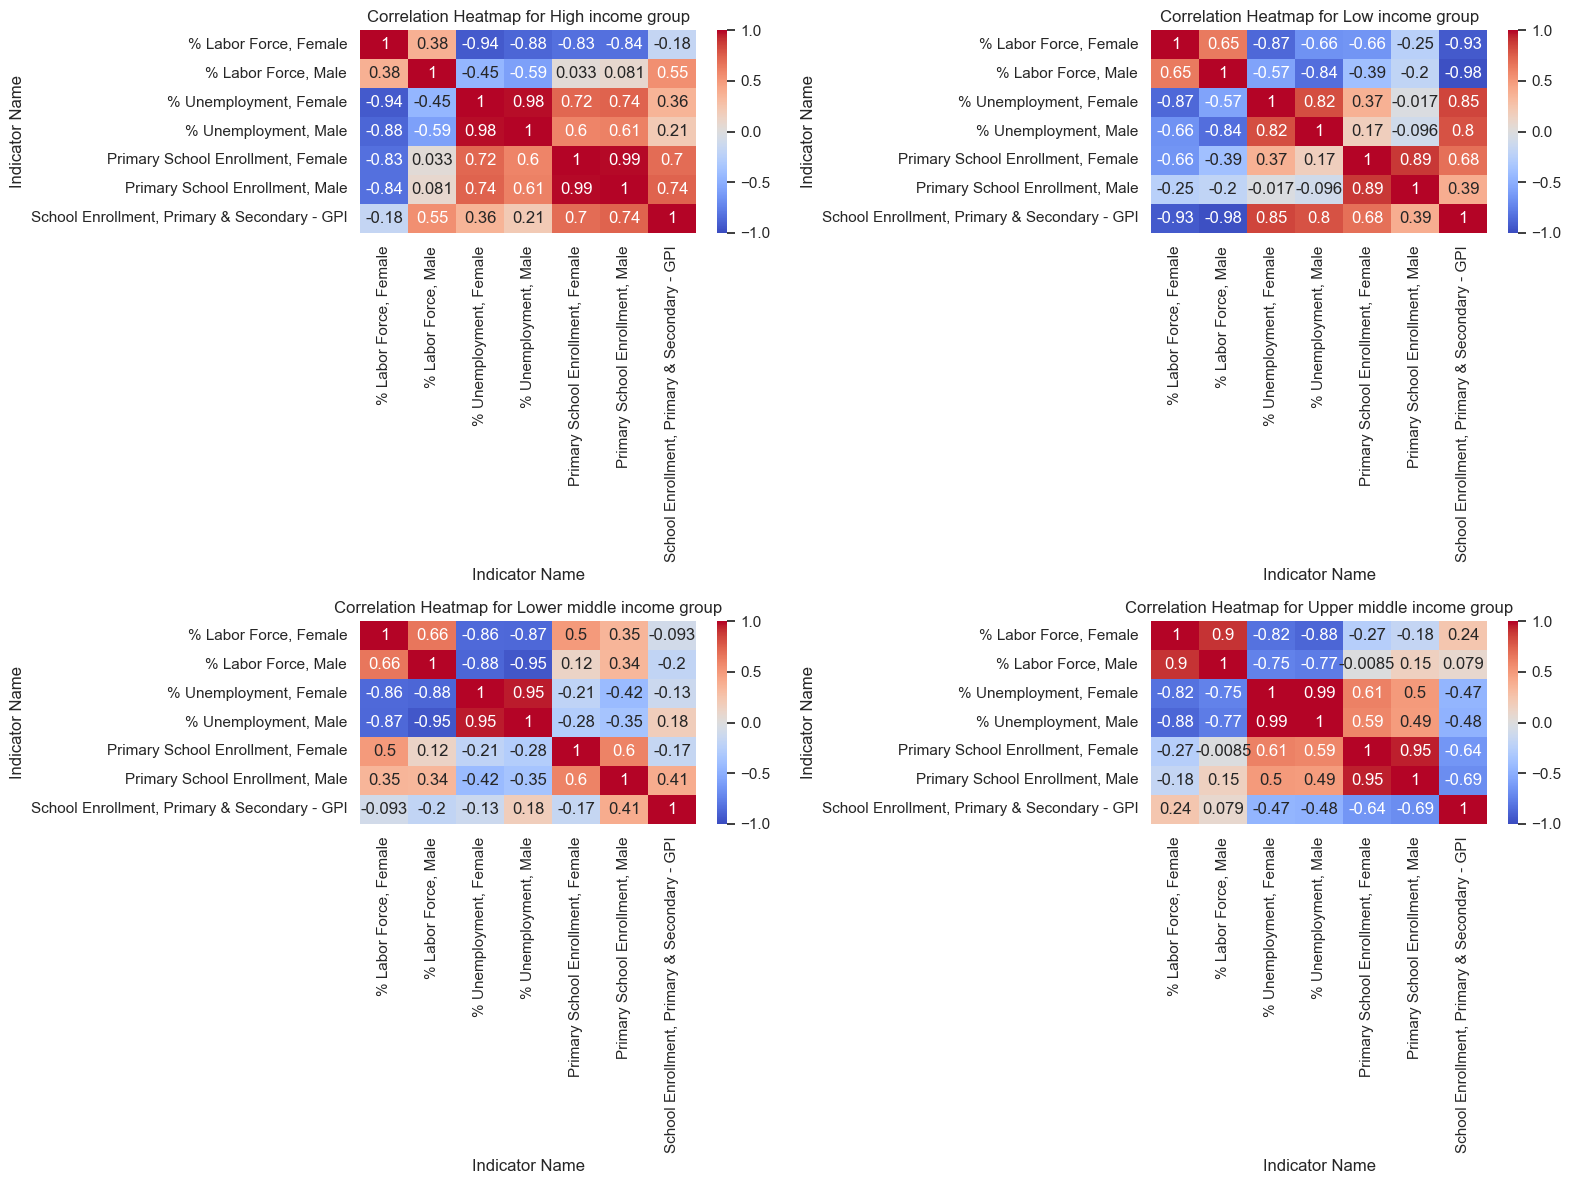

In [20]:
###Heat map comparing all variables for back-end analysis

income_groups = df['income_group'].unique()
selected_metrics = ['CACT.FE.ZS', 'CACT.MA.ZS', 'TOTL.FE.ZS', 'TOTL.MA.ZS', 'PRSC.FM.ZS', 'PRM.ENRR.FE', 'PRM.ENRR.MA']

filtered_heat_metrics = df[df['indicator_code'].str.contains('|'.join(selected_metrics))]
filtered_heat_metrics.rename(columns = {'short_indicator_name': 'Indicator Name'}, inplace = True)

pivot_df = filtered_heat_metrics.pivot_table(index= ['year', 'income_group'], columns = 'Indicator Name', values = 'value', aggfunc = 'mean')
pivot_df.reset_index(inplace = True)

income_groups = pivot_df['income_group'].unique()

# metric_mapping = dict(zip(
#     filtered_heat_metrics['Indicator_Code'].unique(),  # Get unique metrics
#     filtered_heat_metrics['Indicator_Name'].unique()  # Get the corresponding custom names
# ))

ncols = 2  # Number of columns (2 per row)
nrows = (len(income_groups) + ncols - 1) // ncols  # Calculate the number of rows required
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols * 8, nrows * 6))

axes = axes.flatten()

# Loop through each income group and plot a correlation heatmap
for i, income_group in enumerate(income_groups):
    # Filter data for the current income group
    group_data = pivot_df[pivot_df['income_group'] == income_group]

    # Drop non-numeric columns ('Year' and 'Income Group') for correlation calculation
    group_data = group_data.drop(columns=['year', 'income_group'])

    # Calculate the correlation matrix for the selected variables
    correlation_matrix = group_data.corr()

    #correlation_matrix.rename(columns=metric_mapping, index=metric_mapping, inplace=True)

    # Plot the heatmap for this income group
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=axes[i], vmin=-1, vmax=1)
    axes[i].set_title(f'Correlation Heatmap for {income_group} group')
    plt.subplots_adjust(wspace=1.0, hspace=1.5)
    plt.savefig("all_corr.png", bbox_inches='tight')

plt.tight_layout()
plt.show()